<a href="https://colab.research.google.com/github/Weedmastercrucifer/Neural-Networks-and-Fuzzy-Logic/blob/main/Assignment1Details/Assignment1_Q4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Assignment 1 Q4

In [ ]:
data=pd.read_excel('/content/drive/MyDrive/Assignment1NNFL/Copy of data_q4_q5.xlsx') 
data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [ ]:
data=data.sample(frac=1, random_state=50)#randomising data
train,validate,test= np.split(data,[int(.7*len(data)),int(.8*len(data))])#splitting data into train validate and test

In [ ]:
data.head()



,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
356,13.05,18.59,85.09,512.0,0.10820,0.13040,0.096030,0.05603,0.2035,0.06501,0.3106,1.5100,2.590,21.57,0.007807,0.03932,0.051120,0.018760,0.02860,0.005715,14.19,24.85,94.22,591.2,0.1343,0.2658,0.25730,0.12580,0.3113,0.08317,B
556,10.16,19.59,64.73,311.7,0.10030,0.07504,0.005025,0.01116,0.1791,0.06331,0.2441,2.0900,1.648,16.80,0.012910,0.02222,0.004174,0.007082,0.02572,0.002278,10.65,22.88,67.88,347.3,0.1265,0.1200,0.01005,0.02232,0.2262,0.06742,B
283,16.24,18.77,108.80,805.1,0.10660,0.18020,0.194800,0.09052,0.1876,0.06684,0.2873,0.9173,2.464,28.09,0.004563,0.03481,0.038720,0.012090,0.01388,0.004081,18.55,25.09,126.90,1031.0,0.1365,0.4706,0.50260,0.17320,0.2770,0.10630,M
495,14.87,20.21,96.12,680.9,0.09587,0.08345,0.068240,0.04951,0.1487,0.05748,0.2323,1.6360,1.596,21.84,0.005415,0.01371,0.021530,0.011830,0.01959,0.001812,16.01,28.48,103.90,783.6,0.1216,0.1388,0.17000,0.10170,0.2369,0.06599,B
364,13.40,16.95,85.48,552.4,0.07937,0.05696,0.021810,0.01473,0.1650,0.05701,0.1584,0.6124,1.036,13.22,0.004394,0.01250,0.014510,0.005484,0.01291,0.002074,14.73,21.70,93.76,663.5,0.1213,0.1676,0.13640,0.06987,0.2741,0.07582,B


In [ ]:
data.dtypes

radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst       float64
symmetry_worst      

In [ ]:
data['diagnosis'].astype(str)

356    B
556    B
283    M
495    B
364    B
      ..
70     M
132    M
289    B
109    B
480    B
Name: diagnosis, Length: 569, dtype: object

In [ ]:
print(train.shape)
print(validate.shape)
print(test.shape)

(398, 31)
(57, 31)
(114, 31)


In [ ]:
#converting to array for slicing
train=np.array(train) 
print(train) 
validate=np.array(validate) 
print(validate)
test=np.array(test) 
print(test)

[[13.05 18.59 85.09 ... 0.3113 0.08317 'B']
 [10.16 19.59 64.73 ... 0.2262 0.06742 'B']
 [16.24 18.77 108.8 ... 0.277 0.1063 'M']
 ...
 [14.53 19.34 94.25 ... 0.2471 0.07463 'B']
 [12.54 16.32 81.25 ... 0.3155 0.07538 'B']
 [12.99 14.23 84.08 ... 0.2432 0.1009 'B']]
[[11.57 19.04 74.2 ... 0.3035 0.08284 'B']
 [12.3 15.9 78.83 ... 0.2482 0.06306 'B']
 [12.83 15.73 82.89 ... 0.3006 0.07802 'B']
 ...
 [15.22 30.62 103.4 ... 0.4089 0.1409 'M']
 [19.59 25.0 127.7 ... 0.2293 0.06091 'M']
 [10.48 14.98 67.49 ... 0.302 0.09646 'B']]
[[18.81 19.98 120.9 ... 0.2567 0.05737 'M']
 [15.46 19.48 101.7 ... 0.2837 0.08019 'M']
 [9.333 21.94 59.01 ... 0.2435 0.07393 'B']
 ...
 [11.37 18.89 72.17 ... 0.3267 0.06994 'B']
 [11.34 21.26 72.48 ... 0.2829 0.08832 'B']
 [12.16 18.03 78.29 ... 0.2406 0.07729 'B']]


In [ ]:
X_train=train[:,0:30]
m=X_train.shape[0]
xmin=np.min(X_train,axis=0)
xmax=np.max(X_train,axis=0)
X_train=(X_train-xmin)/(xmax-xmin)#performing normalization on input features 
pp=np.ones([m,1])
X_train=np.append(pp,X_train,axis=1) 
print(X_train.shape)

(398, 31)


In [ ]:
y_train=train[:,30]#true outputs of the instances 
y_train

array(['B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'M', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'B', 'B', 'M', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'M',
       'B', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M',
       'B', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'M', 'M', 'B', 'B',
       'M', 'B', 'M', 'B', 'B', 'B', 'M', 'M', 'M', 'B', 'B', 'M', 'M',
       'M', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B',
       'B', 'M', 'M', 'B', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'M',
       'B', 'M', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'M', 'M', 'M',
       'B', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M',
       'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'B', 'B',
       'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B',
       'B', 'M', 'M', 'B', 'M', 'B', 'B', 'M', 'M', 'M', 'M', 'B

In [ ]:
y_train=np.where(y_train=='B',0,1) 
y_train

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1,

In [ ]:
#sigmoid function
def sigmoid(x): 
 return 1.0/(1 + np.exp(-x))

In [ ]:
#cost for an observation
def logistic_loss(y_train,y_pred):
  loss = -y_train * np.log(y_pred)
  loss -= (1-y_train)*np.log(1-y_pred)
  return loss

In [ ]:
def cost_function_no_regu(X,y,w):
  hypothesis=sigmoid(np.dot(X,w.T).astype(float))
  J=(1/(2*len(y)))*np.sum(logistic_loss(y,hypothesis))
  return J

In [ ]:
def batch_gradient_descent_no_regu(X,y,w,alpha,iters):
  cost_hist=np.zeros(iters)#initialising cost function for each iteration 
  w_hist=np.zeros((iters,31))#for storing weight values at each iteration 
  for t in range(iters): 
    
    hypothesis=sigmoid(np.dot(X,w.T).astype(float))
    w=w-(alpha/len(y))*(np.dot(hypothesis-y,X))#updating the weight value
    w_hist[t]=w
    cost_hist[t]=cost_function_no_regu(X,y,w)#storing the cost function value for that iteration 
  minpos=np.argmin(cost_hist)
  w_best=w_hist[minpos]
  return w_best,cost_hist,w_hist  



In [ ]:
def stochastic_gradient_descent_no_regu(X,y,w,alpha,iters):
  cost_hist=np.zeros(iters)#initialising cost function for each iteration 
  w_hist=np.zeros((iters,31))#for storing weight values at each iteration 
  for t in range(iters):
    index=np.random.randint(len(y))#randomly selecting an index from the dataset
    Ind_X=X[index:index+1]#selecting features of that index
    Ind_Y=y[index:index+1]#selecting the true output of that index 
    w=w-alpha*(Ind_X.T.dot(sigmoid(np.dot(Ind_X,w.T).astype(float))-Ind_Y))#updating weight value
    w_hist[t]=w
    cost_hist[t]=cost_function_no_regu(X,y,w)
  minpos=np.argmin(cost_hist)
  w_best=w_hist[minpos] 

  return w_best,cost_hist,w_hist  

In [ ]:
def minibatch_gradient_descent_no_regu(X,y,w,alpha,iters,batch_size):
  cost_hist=np.zeros(iters)#initialising cost function for each iteration 
  w_hist=np.zeros((iters,31))#for storing weight values at each iteration
  for t in range(iters):
    index=np.random.randint(len(y))#randomly selecting an index from the dataset
    Ind_X=X[index:index+batch_size]#selecting features from that index to index+batchsize-1
    Ind_Y=y[index:index+batch_size]#selecting the true outputs from that index to index+batch_size-1
    w=w-(alpha/batch_size)*(Ind_X.T.dot(sigmoid(np.dot(Ind_X,w.T).astype(float))-Ind_Y))#updating weight value
    w_hist[t]=w
    cost_hist[t]=cost_function_no_regu(X,y,w)
  minpos=np.argmin(cost_hist)
  w_best=w_hist[minpos]
  return w_best,cost_hist,w_hist

In [ ]:
w=np.zeros(X_train.shape[1])
alpha=0.05
iters=1500
w_batch_no_regu,cost_hist_batch_no_regu,w_batch_hist_no_regu=batch_gradient_descent_no_regu(X_train,y_train,w,alpha,iters)

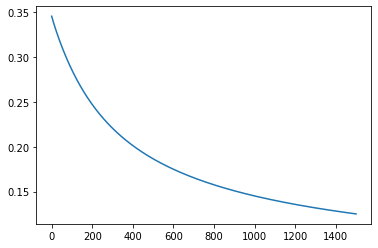

In [ ]:
plt.plot(range(iters),cost_hist_batch_no_regu)
plt.show()

In [ ]:
w_batch_no_regu

array([-3.25877854,  0.76921605,  0.14985659,  0.80130422,  0.83160593,
       -0.49607366,  0.64438615,  1.18724945,  1.43524955, -0.19422449,
       -0.80110808,  0.55113749, -0.45695091,  0.47211451,  0.47627337,
       -0.41750902, -0.07035173, -0.08964784, -0.027792  , -0.53685334,
       -0.29987616,  1.14987684,  0.42505838,  1.09966255,  0.98746259,
        0.22223728,  0.68107597,  1.00518425,  1.44652054,  0.24633404,
        0.06529649])

In [ ]:
alpha=0.05
iters=1500
w_stoch_no_regu,cost_hist_stoch_no_regu,w_stoch_hist_no_regu=stochastic_gradient_descent_no_regu(X_train,y_train,w,alpha,iters)

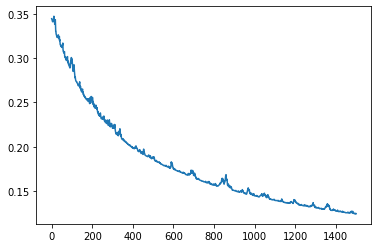

In [ ]:
plt.plot(range(iters),cost_hist_stoch_no_regu)
plt.show()

In [ ]:
w_stoch_no_regu

array([-3.24606415,  0.80935177,  0.10140785,  0.83134066,  0.86468461,
       -0.51531129,  0.57805084,  1.17909138,  1.43235754, -0.13704806,
       -0.87323953,  0.52919657, -0.44617343,  0.44740673,  0.47695444,
       -0.41146566, -0.18436026, -0.11741136, -0.06696365, -0.52470205,
       -0.3669084 ,  1.20473465,  0.46137883,  1.13096424,  1.02932858,
        0.21810898,  0.59660692,  1.02616647,  1.46898054,  0.32625315,
        0.04667362])

In [ ]:
alpha=0.05
iters=1500
w_mini_no_regu,cost_hist_mini_no_regu,w_mini_hist_no_regu=minibatch_gradient_descent_no_regu(X_train,y_train,w,alpha,iters,10)

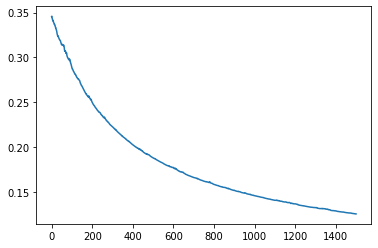

In [ ]:
plt.plot(range(iters),cost_hist_mini_no_regu)
plt.show()

In [ ]:
def cost_function_L2_regu(X,y,w,L2): 
  hypothesis=sigmoid(np.dot(X,w.T).astype(float))
  J=(1/(2*len(y)))*np.sum(logistic_loss(y,hypothesis))+((L2/(2*len(y)))*np.sum(w**2)) 
  return J



In [ ]:
def batch_gradient_descent_L2_regu(X,y,w,alpha,iters,Lambda_):
  cost_hist=np.zeros(iters)#storing cost function value of each iteration
  w_hist=np.zeros((iters,31))#for storing weight values at each iteration
  for t in range(iters): 
    hypothesis=sigmoid(np.dot(X,w.T).astype(float)) 
    w=(w*(1-(alpha*Lambda_)))-(alpha/len(y))*(np.dot(hypothesis-y,X))#updating the weight value
    w_hist[t]=w
    cost_hist[t]=cost_function_L2_regu(X,y,w,Lambda_)#storing the cost function value for that iteration
  minpos=np.argmin(cost_hist)
  w_best=w_hist[minpos]  
  return w_best,cost_hist,w_hist



In [ ]:
def stochastic_gradient_descent_L2_regu(X,y,w,alpha,iters,Lambda_):
  cost_hist=np.zeros(iters)#initialising cost function for each iteration 
  w_hist=np.zeros((iters,31))#for storing weight values at each iteration 
  for t in range(iters):
    index=np.random.randint(len(y))#randomly selecting an index from the dataset
    Ind_X=X[index:index+1]#selecting features of that index
    Ind_Y=y[index:index+1]#selecting the true output of that index 
    w=(w*(1-(alpha*Lambda_)))-alpha*(Ind_X.T.dot(sigmoid(np.dot(Ind_X,w.T).astype(float))-Ind_Y))#updating weight value
    w_hist[t]=w
    cost_hist[t]=cost_function_L2_regu(X,y,w,Lambda_)
  minpos=np.argmin(cost_hist)
  w_best=w_hist[minpos]  
  return w_best,cost_hist,w_hist 

In [ ]:
def minibatch_gradient_descent_L2_regu(X,y,w,alpha,iters,batch_size,Lambda_):
  cost_hist=np.zeros(iters)#initialising cost function for each iteration 
  w_hist=np.zeros((iters,31))#for storing weight values at each iteration
  for t in range(iters):
    index=np.random.randint(len(y))#randomly selecting an index from the dataset
    Ind_X=X[index:index+batch_size]#selecting features from that index to index+batchsize-1
    Ind_Y=y[index:index+batch_size]#selecting the true outputs from that index to index+batch_size-1
    w=(w*(1-(alpha*Lambda_)))-(alpha/batch_size)*(Ind_X.T.dot(sigmoid(np.dot(Ind_X,w.T).astype(float))-Ind_Y))#updating weight value
    w_hist[t]=w
    cost_hist[t]=cost_function_L2_regu(X,y,w,Lambda_)
  minpos=np.argmin(cost_hist)
  w_best=w_hist[minpos]  
  return w_best,cost_hist,w_hist

In [ ]:
alpha=0.05
iters=1500 
Lambda_=0.005
w_batch_L2_regu,cost_hist_batch_L2_regu,w_batch_hist_L2_regu=batch_gradient_descent_L2_regu(X_train,y_train,w,alpha,iters,Lambda_)

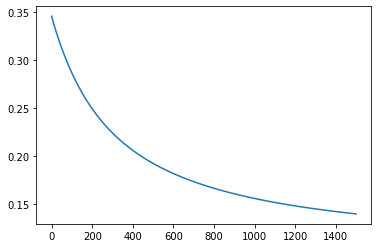

In [ ]:
plt.plot(range(iters),cost_hist_batch_L2_regu)
plt.show()

In [ ]:
alpha=0.05
iters=1500 
Lambda_=0.005
w_stoch_L2_regu,cost_hist_stoch_L2_regu,w_stoch_hist_L2_regu=stochastic_gradient_descent_L2_regu(X_train,y_train,w,alpha,iters,Lambda_)

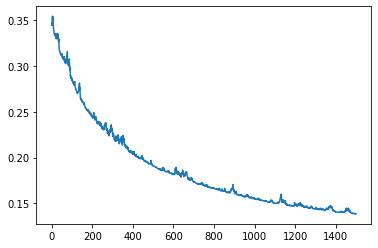

In [ ]:
plt.plot(range(iters),cost_hist_stoch_L2_regu)
plt.show()

In [ ]:
alpha=0.05
iters=1500 
Lambda_=0.005
w_mini_L2_regu,cost_hist_mini_L2_regu,w_mini_hist_L2_regu=minibatch_gradient_descent_L2_regu(X_train,y_train,w,alpha,iters,5,Lambda_)

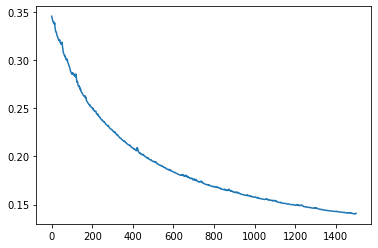

In [ ]:
plt.plot(range(iters),cost_hist_mini_L2_regu)
plt.show()

In [ ]:
def cost_function_L1_regu(X,y,w,L1): 
  hypothesis=sigmoid(np.dot(X,w.T).astype(float))  
  J=(1/(2*len(y)))*np.sum(logistic_loss(y,hypothesis))+((L1/(2*len(y)))*np.sum(abs(w))) 
  return J


In [ ]:
def batch_gradient_descent_L1_regu(X,y,w,alpha,iters,Lambda_): 
  cost_hist=np.zeros(iters)#storing cost function value of each iteration
  w_hist=np.zeros((iters,31))#for storing weight values at each iteration
  for t in range(iters): 
    hypothesis=sigmoid(np.dot(X,w.T).astype(float)) 
    w=w-((alpha*Lambda_)/2)*np.sign(w)-(alpha/len(y))*(np.dot(hypothesis-y,X))#updating the weight value 
    w_hist[t]=w
    cost_hist[t]=cost_function_L1_regu(X,y,w,Lambda_)#storing the cost function value for that iteration
  minpos=np.argmin(cost_hist)
  w_best=w_hist[minpos]  
  return w_best,cost_hist,w_hist


In [ ]:
def stochastic_gradient_descent_L1_regu(X,y,w,alpha,iters,Lambda_):
  cost_hist=np.zeros(iters)#initialising cost function for each iteration 
  w_hist=np.zeros((iters,31))#for storing weight values at each iteration 
  for t in range(iters):
    index=np.random.randint(len(y))#randomly selecting an index from the dataset
    Ind_X=X[index:index+1]#selecting features of that index
    Ind_Y=y[index:index+1]#selecting the true output of that index 
    w=w-((alpha*Lambda_)/2)*np.sign(w) -alpha*(Ind_X.T.dot(sigmoid(np.dot(Ind_X,w.T).astype(float))-Ind_Y))#updating weight value 
    w_hist[t]=w
    cost_hist[t]=cost_function_L1_regu(X,y,w,Lambda_)#storing the cost function value for that iteration
  minpos=np.argmin(cost_hist)
  w_best=w_hist[minpos]  
  return w_best,cost_hist,w_hist

In [ ]:
def minibatch_gradient_descent_L1_regu(X,y,w,alpha,iters,batch_size,Lambda_):
  cost_hist=np.zeros(iters)#initialising cost function for each iteration 
  w_hist=np.zeros((iters,31))#for storing weight values at each iteration
  for t in range(iters):
    index=np.random.randint(len(y))#randomly selecting an index from the dataset
    Ind_X=X[index:index+batch_size]#selecting features from that index to index+batchsize-1
    Ind_Y=y[index:index+batch_size]#selecting the true outputs from that index to index+batch_size-1 
    w=w-((alpha*Lambda_)/2)*np.sign(w)-(alpha/batch_size)*(Ind_X.T.dot(sigmoid(np.dot(Ind_X,w.T).astype(float))-Ind_Y))#updating weight value 
    w_hist[t]=w
    cost_hist[t]=cost_function_L1_regu(X,y,w,Lambda_)#storing the cost function value for that iteration
  minpos=np.argmin(cost_hist)
  w_best=w_hist[minpos]  
  return w_best,cost_hist,w_hist

In [ ]:
alpha=0.05
iters=1500 
Lambda_=0.005
w_batch_L1_regu,cost_hist_batch_L1_regu,w_batch_hist_L1_regu=batch_gradient_descent_L1_regu(X_train,y_train,w,alpha,iters,Lambda_)

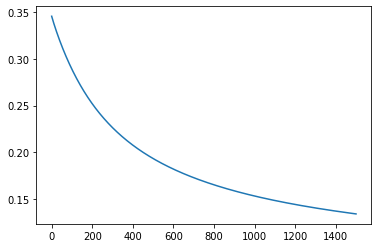

In [ ]:
plt.plot(range(iters),cost_hist_batch_L1_regu)
plt.show()

In [ ]:
alpha=0.05
iters=1500 
Lambda_=0.005
w_stoch_L1_regu,cost_hist_stoch_L1_regu,w_stoch_hist_L1_regu=stochastic_gradient_descent_L1_regu(X_train,y_train,w,alpha,iters,Lambda_)

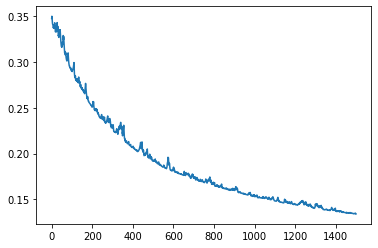

In [ ]:
plt.plot(range(iters),cost_hist_stoch_L1_regu)
plt.show()

In [ ]:
alpha=0.05
iters=1500 
Lambda_=0.005
w_mini_L1_regu,cost_hist_mini_L1_regu,w_mini_hist_L1_regu=minibatch_gradient_descent_L1_regu(X_train,y_train,w,alpha,iters,5,Lambda_)

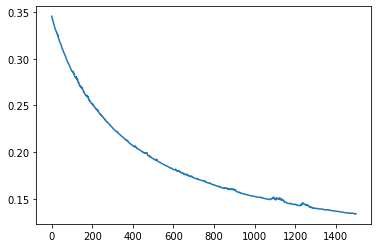

In [ ]:
plt.plot(range(iters),cost_hist_mini_L1_regu)
plt.show()

In [ ]:
X_test=test[:,0:30]
m=X_test.shape[0]
xmin=np.min(X_test,axis=0)
xmax=np.max(X_test,axis=0)
X_test=(X_test-xmin)/(xmax-xmin)#performing normalization on input features 
pp=np.ones([m,1])
X_test=np.append(pp,X_test,axis=1) 
print(X_test.shape)

(114, 31)


In [ ]:
y_test=test[:,30]#true outputs of the instances 
y_test

array(['M', 'M', 'B', 'M', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'M',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'M', 'B',
       'M', 'M', 'M', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'M', 'B',
       'M', 'B', 'M', 'B', 'M', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'B',
       'B', 'M', 'B', 'B', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'M',
       'M', 'B', 'B', 'M', 'M', 'M', 'M', 'B', 'B', 'B'], dtype=object)

In [ ]:
y_test=np.where(y_test=='B',0,1) 
y_test

array([1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0])

In [ ]:
#testing models against test data 
def predict(X_test,y_test,weights):
  hypothesis=X_test@weights
  y_pred=np.round(sigmoid(hypothesis.astype(float)))
  #printing predicted and actual output
  for i in range(X_test.shape[0]):
        print("Predicted: {0}  Actual:{1}".format(y_pred[i],round(y_test[i])))
  return y_pred

In [ ]:
def sas(y_pred, y_test):
    tp = tn = fp = fn = 0 #initialising true positive, true negative, false positive and false negative
    m = y_test.shape[0]
    for i in range(m):
        if y_pred[i] == 1:
            if y_test[i] == 1:
                tp+=1
            else:
                fp+=1
        elif y_pred[i] == 0:
            if y_test[i] == 0:
                tn+=1
            else:
                fn+=1
    se = tp/(tp+fn)
    sp = tn/(tn+fp)
    ac = (tn+tp)/m
    print("Sensitivity: {0}, Specificity: {1} and Accuracy: {2}".format(se,sp,ac))



In [ ]:
#results of batch gradient with no regularization 
y_pred_batch_no_regu=predict(X_test,y_test,w_batch_no_regu)
sas(y_pred_batch_no_regu,y_test)

Predicted: 1.0  Actual:1
Predicted: 1.0  Actual:1
Predicted: 0.0  Actual:0
Predicted: 1.0  Actual:1
Predicted: 1.0  Actual:1
Predicted: 1.0  Actual:1
Predicted: 0.0  Actual:0
Predicted: 1.0  Actual:1
Predicted: 0.0  Actual:0
Predicted: 0.0  Actual:0
Predicted: 0.0  Actual:0
Predicted: 0.0  Actual:0
Predicted: 0.0  Actual:0
Predicted: 0.0  Actual:0
Predicted: 0.0  Actual:0
Predicted: 1.0  Actual:1
Predicted: 0.0  Actual:0
Predicted: 0.0  Actual:0
Predicted: 0.0  Actual:0
Predicted: 0.0  Actual:0
Predicted: 1.0  Actual:0
Predicted: 0.0  Actual:0
Predicted: 0.0  Actual:0
Predicted: 0.0  Actual:0
Predicted: 0.0  Actual:0
Predicted: 0.0  Actual:0
Predicted: 0.0  Actual:0
Predicted: 1.0  Actual:1
Predicted: 0.0  Actual:0
Predicted: 0.0  Actual:0
Predicted: 0.0  Actual:0
Predicted: 0.0  Actual:0
Predicted: 0.0  Actual:0
Predicted: 1.0  Actual:1
Predicted: 1.0  Actual:0
Predicted: 1.0  Actual:0
Predicted: 1.0  Actual:1
Predicted: 0.0  Actual:0
Predicted: 1.0  Actual:1
Predicted: 0.0  Actual:0


In [ ]:
#results of batch gradient with L2 regularization 
y_pred_batch_L2_regu=predict(X_test,y_test,w_batch_L2_regu)
sas(y_pred_batch_L2_regu,y_test)

Predicted: 1.0  Actual:1
Predicted: 1.0  Actual:1
Predicted: 0.0  Actual:0
Predicted: 1.0  Actual:1
Predicted: 1.0  Actual:1
Predicted: 1.0  Actual:1
Predicted: 0.0  Actual:0
Predicted: 1.0  Actual:1
Predicted: 0.0  Actual:0
Predicted: 0.0  Actual:0
Predicted: 0.0  Actual:0
Predicted: 0.0  Actual:0
Predicted: 0.0  Actual:0
Predicted: 0.0  Actual:0
Predicted: 0.0  Actual:0
Predicted: 1.0  Actual:1
Predicted: 0.0  Actual:0
Predicted: 0.0  Actual:0
Predicted: 0.0  Actual:0
Predicted: 0.0  Actual:0
Predicted: 1.0  Actual:0
Predicted: 0.0  Actual:0
Predicted: 0.0  Actual:0
Predicted: 0.0  Actual:0
Predicted: 0.0  Actual:0
Predicted: 0.0  Actual:0
Predicted: 0.0  Actual:0
Predicted: 1.0  Actual:1
Predicted: 0.0  Actual:0
Predicted: 0.0  Actual:0
Predicted: 0.0  Actual:0
Predicted: 0.0  Actual:0
Predicted: 0.0  Actual:0
Predicted: 1.0  Actual:1
Predicted: 1.0  Actual:0
Predicted: 1.0  Actual:0
Predicted: 1.0  Actual:1
Predicted: 0.0  Actual:0
Predicted: 1.0  Actual:1
Predicted: 0.0  Actual:0


In [ ]:
#results of batch gradient with L1 regularization 
y_pred_batch_L1_regu=predict(X_test,y_test,w_batch_L1_regu)
sas(y_pred_batch_L1_regu,y_test)

Predicted: 1.0  Actual:1
Predicted: 1.0  Actual:1
Predicted: 0.0  Actual:0
Predicted: 1.0  Actual:1
Predicted: 1.0  Actual:1
Predicted: 1.0  Actual:1
Predicted: 0.0  Actual:0
Predicted: 1.0  Actual:1
Predicted: 0.0  Actual:0
Predicted: 0.0  Actual:0
Predicted: 0.0  Actual:0
Predicted: 0.0  Actual:0
Predicted: 0.0  Actual:0
Predicted: 0.0  Actual:0
Predicted: 0.0  Actual:0
Predicted: 1.0  Actual:1
Predicted: 0.0  Actual:0
Predicted: 0.0  Actual:0
Predicted: 0.0  Actual:0
Predicted: 0.0  Actual:0
Predicted: 1.0  Actual:0
Predicted: 0.0  Actual:0
Predicted: 0.0  Actual:0
Predicted: 0.0  Actual:0
Predicted: 0.0  Actual:0
Predicted: 0.0  Actual:0
Predicted: 0.0  Actual:0
Predicted: 1.0  Actual:1
Predicted: 0.0  Actual:0
Predicted: 0.0  Actual:0
Predicted: 0.0  Actual:0
Predicted: 0.0  Actual:0
Predicted: 0.0  Actual:0
Predicted: 1.0  Actual:1
Predicted: 0.0  Actual:0
Predicted: 1.0  Actual:0
Predicted: 1.0  Actual:1
Predicted: 0.0  Actual:0
Predicted: 1.0  Actual:1
Predicted: 0.0  Actual:0


In [ ]:
#results of stochastic gradient with no regularization 
y_pred_stoch_no_regu=predict(X_test,y_test,w_stoch_no_regu)    
sas(y_pred_stoch_no_regu,y_test)

Predicted: 1.0  Actual:1
Predicted: 1.0  Actual:1
Predicted: 0.0  Actual:0
Predicted: 1.0  Actual:1
Predicted: 1.0  Actual:1
Predicted: 1.0  Actual:1
Predicted: 0.0  Actual:0
Predicted: 1.0  Actual:1
Predicted: 0.0  Actual:0
Predicted: 0.0  Actual:0
Predicted: 0.0  Actual:0
Predicted: 0.0  Actual:0
Predicted: 0.0  Actual:0
Predicted: 0.0  Actual:0
Predicted: 0.0  Actual:0
Predicted: 1.0  Actual:1
Predicted: 0.0  Actual:0
Predicted: 0.0  Actual:0
Predicted: 0.0  Actual:0
Predicted: 0.0  Actual:0
Predicted: 1.0  Actual:0
Predicted: 0.0  Actual:0
Predicted: 0.0  Actual:0
Predicted: 0.0  Actual:0
Predicted: 0.0  Actual:0
Predicted: 0.0  Actual:0
Predicted: 0.0  Actual:0
Predicted: 1.0  Actual:1
Predicted: 0.0  Actual:0
Predicted: 0.0  Actual:0
Predicted: 0.0  Actual:0
Predicted: 0.0  Actual:0
Predicted: 0.0  Actual:0
Predicted: 1.0  Actual:1
Predicted: 1.0  Actual:0
Predicted: 1.0  Actual:0
Predicted: 1.0  Actual:1
Predicted: 0.0  Actual:0
Predicted: 1.0  Actual:1
Predicted: 0.0  Actual:0


In [ ]:
#results of stochastic gradient with L2 regularization 
y_pred_stoch_L2_regu=predict(X_test,y_test,w_stoch_L2_regu)
sas(y_pred_stoch_L2_regu,y_test)

Predicted: 1.0  Actual:1
Predicted: 1.0  Actual:1
Predicted: 0.0  Actual:0
Predicted: 1.0  Actual:1
Predicted: 1.0  Actual:1
Predicted: 1.0  Actual:1
Predicted: 0.0  Actual:0
Predicted: 1.0  Actual:1
Predicted: 0.0  Actual:0
Predicted: 0.0  Actual:0
Predicted: 0.0  Actual:0
Predicted: 0.0  Actual:0
Predicted: 0.0  Actual:0
Predicted: 0.0  Actual:0
Predicted: 0.0  Actual:0
Predicted: 1.0  Actual:1
Predicted: 0.0  Actual:0
Predicted: 0.0  Actual:0
Predicted: 0.0  Actual:0
Predicted: 0.0  Actual:0
Predicted: 1.0  Actual:0
Predicted: 0.0  Actual:0
Predicted: 0.0  Actual:0
Predicted: 0.0  Actual:0
Predicted: 0.0  Actual:0
Predicted: 0.0  Actual:0
Predicted: 0.0  Actual:0
Predicted: 1.0  Actual:1
Predicted: 0.0  Actual:0
Predicted: 0.0  Actual:0
Predicted: 0.0  Actual:0
Predicted: 0.0  Actual:0
Predicted: 0.0  Actual:0
Predicted: 1.0  Actual:1
Predicted: 1.0  Actual:0
Predicted: 1.0  Actual:0
Predicted: 1.0  Actual:1
Predicted: 0.0  Actual:0
Predicted: 1.0  Actual:1
Predicted: 0.0  Actual:0


In [ ]:
#results of stochastic gradient with L1 regularization 
y_pred_stoch_L1_regu=predict(X_test,y_test,w_stoch_L1_regu)
sas(y_pred_stoch_L1_regu,y_test)

Predicted: 1.0  Actual:1
Predicted: 1.0  Actual:1
Predicted: 0.0  Actual:0
Predicted: 1.0  Actual:1
Predicted: 1.0  Actual:1
Predicted: 1.0  Actual:1
Predicted: 0.0  Actual:0
Predicted: 1.0  Actual:1
Predicted: 0.0  Actual:0
Predicted: 0.0  Actual:0
Predicted: 0.0  Actual:0
Predicted: 0.0  Actual:0
Predicted: 0.0  Actual:0
Predicted: 0.0  Actual:0
Predicted: 0.0  Actual:0
Predicted: 1.0  Actual:1
Predicted: 0.0  Actual:0
Predicted: 0.0  Actual:0
Predicted: 0.0  Actual:0
Predicted: 0.0  Actual:0
Predicted: 1.0  Actual:0
Predicted: 0.0  Actual:0
Predicted: 0.0  Actual:0
Predicted: 0.0  Actual:0
Predicted: 0.0  Actual:0
Predicted: 0.0  Actual:0
Predicted: 0.0  Actual:0
Predicted: 1.0  Actual:1
Predicted: 0.0  Actual:0
Predicted: 0.0  Actual:0
Predicted: 0.0  Actual:0
Predicted: 0.0  Actual:0
Predicted: 0.0  Actual:0
Predicted: 1.0  Actual:1
Predicted: 1.0  Actual:0
Predicted: 1.0  Actual:0
Predicted: 1.0  Actual:1
Predicted: 0.0  Actual:0
Predicted: 1.0  Actual:1
Predicted: 0.0  Actual:0


In [ ]:
#results of minibatch gradient with no regularization 
y_pred_mini_no_regu=predict(X_test,y_test,w_mini_no_regu)
sas(y_pred_mini_no_regu,y_test)

Predicted: 1.0  Actual:1
Predicted: 1.0  Actual:1
Predicted: 0.0  Actual:0
Predicted: 1.0  Actual:1
Predicted: 1.0  Actual:1
Predicted: 1.0  Actual:1
Predicted: 0.0  Actual:0
Predicted: 1.0  Actual:1
Predicted: 0.0  Actual:0
Predicted: 0.0  Actual:0
Predicted: 0.0  Actual:0
Predicted: 0.0  Actual:0
Predicted: 0.0  Actual:0
Predicted: 0.0  Actual:0
Predicted: 0.0  Actual:0
Predicted: 1.0  Actual:1
Predicted: 0.0  Actual:0
Predicted: 0.0  Actual:0
Predicted: 0.0  Actual:0
Predicted: 0.0  Actual:0
Predicted: 1.0  Actual:0
Predicted: 0.0  Actual:0
Predicted: 0.0  Actual:0
Predicted: 0.0  Actual:0
Predicted: 0.0  Actual:0
Predicted: 0.0  Actual:0
Predicted: 0.0  Actual:0
Predicted: 1.0  Actual:1
Predicted: 0.0  Actual:0
Predicted: 0.0  Actual:0
Predicted: 0.0  Actual:0
Predicted: 0.0  Actual:0
Predicted: 0.0  Actual:0
Predicted: 1.0  Actual:1
Predicted: 1.0  Actual:0
Predicted: 1.0  Actual:0
Predicted: 1.0  Actual:1
Predicted: 0.0  Actual:0
Predicted: 1.0  Actual:1
Predicted: 0.0  Actual:0


In [ ]:
#results of minibatch gradient with L2 regularization 
y_pred_mini_L2_regu=predict(X_test,y_test,w_mini_L2_regu)
sas(y_pred_mini_L2_regu,y_test)

Predicted: 1.0  Actual:1
Predicted: 1.0  Actual:1
Predicted: 0.0  Actual:0
Predicted: 1.0  Actual:1
Predicted: 1.0  Actual:1
Predicted: 1.0  Actual:1
Predicted: 0.0  Actual:0
Predicted: 1.0  Actual:1
Predicted: 0.0  Actual:0
Predicted: 0.0  Actual:0
Predicted: 0.0  Actual:0
Predicted: 0.0  Actual:0
Predicted: 0.0  Actual:0
Predicted: 0.0  Actual:0
Predicted: 0.0  Actual:0
Predicted: 1.0  Actual:1
Predicted: 0.0  Actual:0
Predicted: 0.0  Actual:0
Predicted: 0.0  Actual:0
Predicted: 0.0  Actual:0
Predicted: 1.0  Actual:0
Predicted: 0.0  Actual:0
Predicted: 0.0  Actual:0
Predicted: 0.0  Actual:0
Predicted: 0.0  Actual:0
Predicted: 0.0  Actual:0
Predicted: 0.0  Actual:0
Predicted: 1.0  Actual:1
Predicted: 0.0  Actual:0
Predicted: 0.0  Actual:0
Predicted: 0.0  Actual:0
Predicted: 0.0  Actual:0
Predicted: 0.0  Actual:0
Predicted: 1.0  Actual:1
Predicted: 1.0  Actual:0
Predicted: 1.0  Actual:0
Predicted: 1.0  Actual:1
Predicted: 0.0  Actual:0
Predicted: 1.0  Actual:1
Predicted: 0.0  Actual:0


In [ ]:
#results of minibatch gradient with no regularization 
y_pred_mini_L1_regu=predict(X_test,y_test,w_mini_L1_regu)
sas(y_pred_mini_L1_regu,y_test)

Predicted: 1.0  Actual:1
Predicted: 1.0  Actual:1
Predicted: 0.0  Actual:0
Predicted: 1.0  Actual:1
Predicted: 1.0  Actual:1
Predicted: 1.0  Actual:1
Predicted: 0.0  Actual:0
Predicted: 1.0  Actual:1
Predicted: 0.0  Actual:0
Predicted: 0.0  Actual:0
Predicted: 0.0  Actual:0
Predicted: 0.0  Actual:0
Predicted: 0.0  Actual:0
Predicted: 0.0  Actual:0
Predicted: 0.0  Actual:0
Predicted: 1.0  Actual:1
Predicted: 0.0  Actual:0
Predicted: 0.0  Actual:0
Predicted: 0.0  Actual:0
Predicted: 0.0  Actual:0
Predicted: 1.0  Actual:0
Predicted: 0.0  Actual:0
Predicted: 0.0  Actual:0
Predicted: 0.0  Actual:0
Predicted: 0.0  Actual:0
Predicted: 0.0  Actual:0
Predicted: 0.0  Actual:0
Predicted: 1.0  Actual:1
Predicted: 0.0  Actual:0
Predicted: 0.0  Actual:0
Predicted: 0.0  Actual:0
Predicted: 0.0  Actual:0
Predicted: 0.0  Actual:0
Predicted: 1.0  Actual:1
Predicted: 0.0  Actual:0
Predicted: 1.0  Actual:0
Predicted: 1.0  Actual:1
Predicted: 0.0  Actual:0
Predicted: 1.0  Actual:1
Predicted: 0.0  Actual:0


In [ ]:
print(w_batch_no_regu)
print(w_batch_L1_regu)
print(w_batch_L2_regu)

[-3.25877854  0.76921605  0.14985659  0.80130422  0.83160593 -0.49607366
  0.64438615  1.18724945  1.43524955 -0.19422449 -0.80110808  0.55113749
 -0.45695091  0.47211451  0.47627337 -0.41750902 -0.07035173 -0.08964784
 -0.027792   -0.53685334 -0.29987616  1.14987684  0.42505838  1.09966255
  0.98746259  0.22223728  0.68107597  1.00518425  1.44652054  0.24633404
  0.06529649]
[-3.11645293e+00  6.93283765e-01  5.39254495e-02  7.25117983e-01
  7.38587179e-01 -3.17182599e-01  5.22266766e-01  1.08480916e+00
  1.35186109e+00 -1.38673266e-02 -6.62707316e-01  3.97138190e-01
 -3.15098993e-01  3.15286860e-01  3.22478913e-01 -2.74552133e-01
 -1.33093565e-04 -3.25966176e-03  9.91561199e-06 -4.04502372e-01
 -1.34019954e-01  1.08636600e+00  3.10401194e-01  1.03137071e+00
  8.93988067e-01  1.04533789e-01  5.66204335e-01  9.15129263e-01
  1.39815000e+00  1.08625107e-01  6.29520042e-06]
[-2.79786894  0.65716199  0.11775571  0.68479046  0.7099504  -0.43407683
  0.55370838  1.01625701  1.2264055  -0.172

In [ ]:
print(w_stoch_no_regu)
print(w_stoch_L1_regu)
print(w_stoch_L2_regu)

[-3.24606415  0.80935177  0.10140785  0.83134066  0.86468461 -0.51531129
  0.57805084  1.17909138  1.43235754 -0.13704806 -0.87323953  0.52919657
 -0.44617343  0.44740673  0.47695444 -0.41146566 -0.18436026 -0.11741136
 -0.06696365 -0.52470205 -0.3669084   1.20473465  0.46137883  1.13096424
  1.02932858  0.21810898  0.59660692  1.02616647  1.46898054  0.32625315
  0.04667362]
[-3.10981691  0.72390221  0.08101596  0.75645053  0.76260826 -0.36961982
  0.5056813   1.10901729  1.38571504 -0.0673781  -0.66101822  0.45330682
 -0.22854657  0.38308293  0.34615714 -0.23230859 -0.01153472 -0.01025584
  0.022904   -0.56929231 -0.02332522  1.07164008  0.22556907  1.02511697
  0.87468369  0.11327311  0.54258071  0.90125357  1.39013409  0.02082503
  0.01243148]
[-2.86718475  0.61871159  0.09999076  0.64924206  0.6854871  -0.50533653
  0.58262687  1.03043284  1.22486822 -0.10000579 -0.64851987  0.41851046
 -0.38718097  0.36841592  0.38154115 -0.40963808 -0.04303999 -0.04540243
 -0.04341658 -0.3906050

In [ ]:
print(w_mini_no_regu)
print(w_mini_L1_regu)
print(w_mini_L2_regu)

[-3.23918552  0.7442097   0.16971449  0.77680348  0.80997037 -0.48222375
  0.62790262  1.18026481  1.42718862 -0.18707212 -0.80440316  0.55082538
 -0.42517732  0.47400877  0.47565413 -0.41879568 -0.07679166 -0.09724937
 -0.02745226 -0.49322942 -0.31466046  1.13682301  0.46380177  1.08706494
  0.97945613  0.24529736  0.66184558  0.99548026  1.45444758  0.25782379
  0.04824485]
[-3.17614955  0.63443903  0.04792755  0.66910129  0.69518755 -0.30352966
  0.53094285  1.10070488  1.34141014 -0.01109077 -0.65448564  0.38389423
 -0.31212853  0.30385042  0.31363508 -0.25069814 -0.02443637 -0.03568604
 -0.01114591 -0.43029262 -0.15963872  1.05020731  0.31595438  0.99960349
  0.87427665  0.16240894  0.5939601   0.96240219  1.40408829  0.12700766
  0.0045898 ]
[-2.78863864  0.64493374  0.10057287  0.6719861   0.69468629 -0.38615413
  0.56811123  1.01921084  1.21590023 -0.10483338 -0.67620776  0.46002961
 -0.41273012  0.39693915  0.3947136  -0.38757336 -0.06941187 -0.07945849
 -0.04721649 -0.422628 